# Data Analysis

### **The Dataset**

The dataset is a collection of used cars for sale in the US.

The goal is to analyze the data and develop a car classification model that will determine the price category of a used car depending on its characteristics.

NAVIGATION

[<- Data Cleaning](retro_cars_cleaning.ipynb) | [Classification models ->](retro_cars_modeling.ipynb)

-
-
-

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [79]:
df_clean = pd.read_csv('data/df_clean.csv', sep=',')
df_clean.shape

(9997, 18)

In [80]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            9997 non-null   int64  
 1   year             9997 non-null   float64
 2   manufacturer     9997 non-null   object 
 3   condition        9997 non-null   object 
 4   cylinders        9997 non-null   int64  
 5   fuel             9997 non-null   object 
 6   odometer         9997 non-null   float64
 7   title_status     9997 non-null   object 
 8   transmission     9997 non-null   object 
 9   drive            9997 non-null   object 
 10  size             9997 non-null   object 
 11  type             9997 non-null   object 
 12  paint_color      9997 non-null   object 
 13  state            9997 non-null   object 
 14  lat              9997 non-null   float64
 15  long             9997 non-null   float64
 16  price_category   9997 non-null   object 
 17  description_le

In [81]:
df_clean.describe().round()

,price,year,cylinders,odometer,lat,long,description_len
count,9997.0,9997.0,9997.0,9997.0,9997.0,9997.0,9997.0
mean,20683.0,2011.0,4.0,95655.0,39.0,-94.0,2798.0
std,124641.0,10.0,3.0,86482.0,6.0,18.0,2776.0
min,500.0,1915.0,0.0,0.0,-67.0,-158.0,4.0
25%,7900.0,2008.0,0.0,39149.0,35.0,-109.0,525.0
50%,15763.0,2013.0,4.0,88514.0,39.0,-88.0,2213.0
75%,27990.0,2017.0,6.0,136875.0,42.0,-81.0,4265.0
max,12345678.0,2022.0,12.0,3245000.0,65.0,174.0,26777.0


-
-
-

### Target data analysis (Price category)

In [82]:
def percentage_values(column_name):
    print(f'Percentage of occurrence of each {column_name.name} value in the dataset')
    count = column_name.value_counts(dropna=False)
    percentage = (count / len(column_name)*100).round(2)
    return pd.concat([count,percentage], axis=1, keys=['count', 'percentage'])

In [83]:
percentage_values(df_clean['price_category'])

Percentage of occurrence of each price_category value in the dataset


,count,percentage
high,3495,34.96
medium,3279,32.80
low,3223,32.24


In [84]:
def print_bar(column_name, figsize, rotation):
    colors=['#A72929','#85B9D2', '#163063']
    plt.figure(figsize=(15, 3))
    column_name.value_counts().plot(kind='bar', figsize=figsize, width=0.6, color=colors)

    plt.xlabel(column_name.name)
    plt.xticks(rotation=rotation)
    plt.ylabel('frequency')
    plt.title(f'Distribution by {column_name.name}');

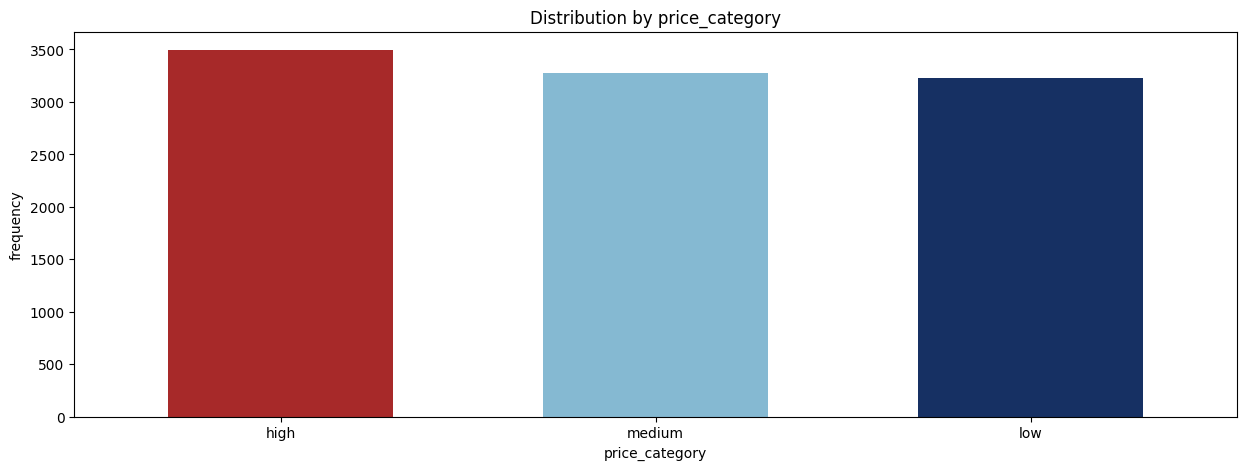

In [85]:
print_bar(df_clean['price_category'], (15,5), 0)

In [86]:
df_prepared = df_clean.copy()

In [87]:
df_prepared['price_cat_num'] = df_prepared['price_category'].replace({'low': 1, 'medium': 2, 'high': 3})
df_prepared['price_cat_num'].dtype

dtype('int64')

In [88]:
def print_corr(data):
    plt.figure(figsize=(15, 8))

    columns = data.corr().columns.tolist()
    plt.imshow(data.corr(), vmin=-1, vmax=1, cmap=('RdBu'))

    plt.title('Correlation analysis between numerical features')
    plt.xticks(range(0, len(columns)), columns, size=7, rotation=45)
    plt.yticks(range(0, len(columns)), columns, size=7)
    plt.colorbar()
    plt.show()

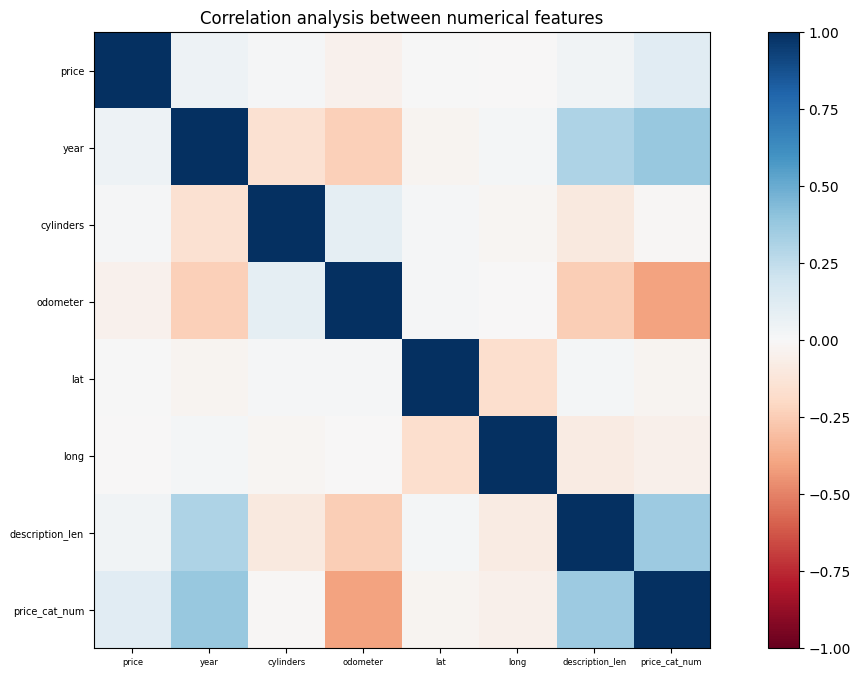

In [89]:
print_corr(df_prepared)

-
-
-

#### Functions for future use

In [90]:
def print_boxplot(column_name):
    fig, ax = plt.subplots(figsize=(15, 4))
    ax.set_title(f'Boxplot of {column_name.name}')
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

    flierprops = dict(marker='o', markersize=5, markerfacecolor='#163063',
                  markeredgewidth=1, markeredgecolor='#163063')  

    bp = ax.boxplot(column_name, vert=False, widths=0.5, patch_artist = True, flierprops = flierprops)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='#163063', linewidth = 2)

    for patch in bp['boxes']:
        patch.set(facecolor='#85B9D2')    
        
    bp;

In [91]:
def print_hist(column_name):
    plt.figure(figsize=(15, 5))
    plt.hist(column_name, bins=50, color='#163063', rwidth=0.8)
    plt.xlabel(f'{column_name.name} range')
    plt.ylabel('frequency')
    plt.title(f'{column_name.name} distribution');

In [92]:
def hist_by_target_feature(data, col_name, target_col, figsize):
    colors = {data[target_col].unique()[0]: '#A72929', 
              data[target_col].unique()[1]: '#85B9D2',
              data[target_col].unique()[2]: '#163063'}

    fig, ax = plt.subplots(figsize=figsize)
    for category in colors:
        color = colors[category]
        data_part = data[data[target_col] == category]

        ax.hist(data_part[col_name], bins=20, color=color, alpha=0.7)
        
    plt.ylabel('frequency')
    plt.xlabel(data[col_name].name)
    plt.title(f'Distribution of {data[col_name].name} by {data[target_col].name}')
    plt.legend(colors, title=(data[target_col].name));

In [93]:
def print_scatter(column_x, column_y, figsize):
    plt.figure(figsize=figsize)
    plt.scatter(column_x, column_y, color='#163063')
    plt.title(f'Dependence of {column_y.name} on {column_x.name}')
    plt.xlabel(column_x.name)
    plt.ylabel(column_y.name)
    plt.show();

In [94]:
def scatter_by_target_feature(data, col_x, col_y, target_col, figsize, legend_place):
    colors = {data[target_col].unique()[0]: '#A72929', 
              data[target_col].unique()[1]: '#85B9D2',
              data[target_col].unique()[2]: '#163063'}
    
    fig, ax = plt.subplots(figsize=figsize)
    for category in colors:
        color = colors[category]
        data_part = data[data[target_col] == category]

        ax.scatter(data_part[col_x], data_part[col_y], c=color, label=category)

    plt.xlabel(data[col_x].name)
    plt.ylabel(data[col_y].name)
    plt.title(f'Dependence of {data[col_x].name} on {data[col_y].name}')
    ax.legend(loc=legend_place, framealpha=0.8, title=(data[target_col].name))
    plt.show();

-

In [95]:
def calculate_boundaries(column_name):
    # range of normal values
    q25 = column_name.quantile(0.25)
    q75 = column_name.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)

    return boundaries

In [96]:
def calculate_outliers(column_name):
    # outliers
    is_outlier = (column_name < calculate_boundaries(column_name)[0]) | (column_name > calculate_boundaries(column_name)[1])

    return is_outlier

In [97]:
def outliers(column_name):
    print(f'min {column_name.name}: {column_name.min()}')
    print(f'max {column_name.name}: {column_name.max()}')
    print(f'median {column_name.name}: {column_name.median()}')
    
    print('Range of normal values', calculate_boundaries(column_name))

    if column_name.min() < calculate_boundaries(column_name)[0]:
        print('MINIMUM VALUE BELOW NORMAL')

    if column_name.max() > calculate_boundaries(column_name)[1]:
        print('MAXIMUM VALUE ABOVE NORMAL')

    print(f'Number of outliers in the {column_name.name} column: {calculate_outliers(column_name).sum()}')
    print(f'Percentage of outliers in the {column_name.name} column: {(calculate_outliers(column_name).sum() / len(column_name) * 100).round(2)} %')

In [98]:
def lower_outlier_replacement(data, col_name):
    lower_outlier = data[col_name] < calculate_boundaries(data[col_name])[0]
    lower_boundary = calculate_boundaries(data[col_name])[0]

    data.loc[lower_outlier, [col_name]] = lower_boundary

In [99]:
def upper_outlier_replacement(data, col_name):
    upper_outlier = data[col_name] > calculate_boundaries(data[col_name])[1]
    upper_boundary = calculate_boundaries(data[col_name])[1]

    data.loc[upper_outlier, [col_name]] = upper_boundary

-
-
-

### Elimination of outliers

#### Car price

In [100]:
outliers(df_prepared.price)

min price: 500
max price: 12345678
median price: 15763.0
Range of normal values (-22235.0, 58125.0)
MAXIMUM VALUE ABOVE NORMAL
Number of outliers in the price column: 215
Percentage of outliers in the price column: 2.15 %


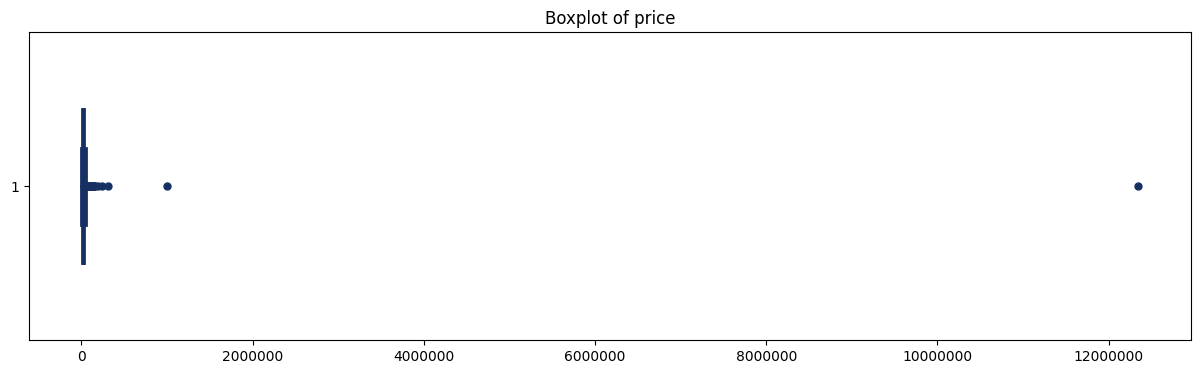

In [101]:
print_boxplot(df_prepared.price)

In [102]:
df_prepared[['price', 'price_cat_num']].corr().round(2)

,price,price_cat_num
price,1.00,0.11
price_cat_num,0.11,1.00


In [103]:
upper_outlier_replacement(df_prepared, 'price')

In [104]:
outliers(df_prepared.price)

min price: 500
max price: 58125
median price: 15763.0
Range of normal values (-22235.0, 58125.0)
Number of outliers in the price column: 0
Percentage of outliers in the price column: 0.0 %


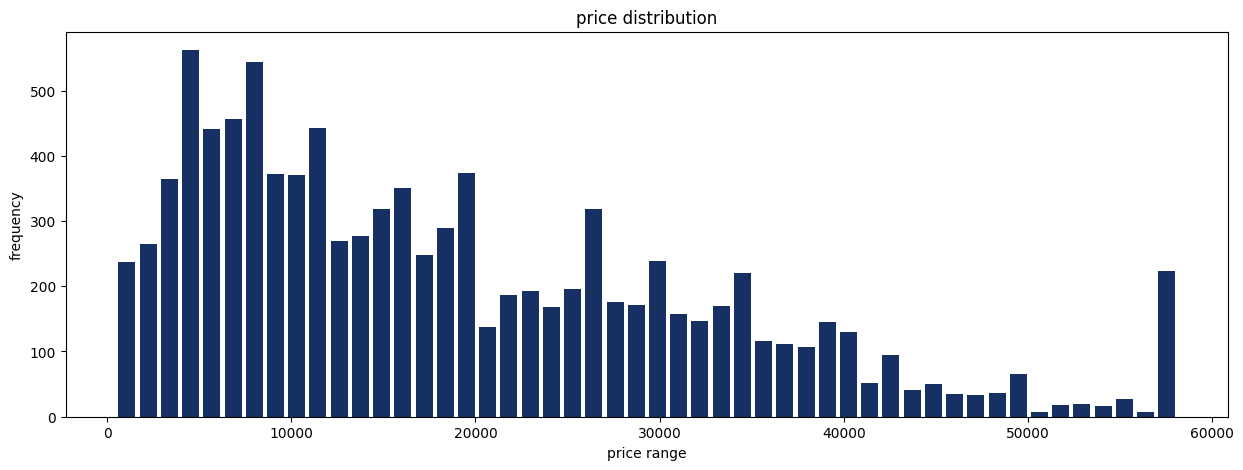

In [105]:
print_hist(df_prepared.price)

In [106]:
df_prepared[['price', 'price_cat_num']].corr().round(2)

,price,price_cat_num
price,1.00,0.88
price_cat_num,0.88,1.00


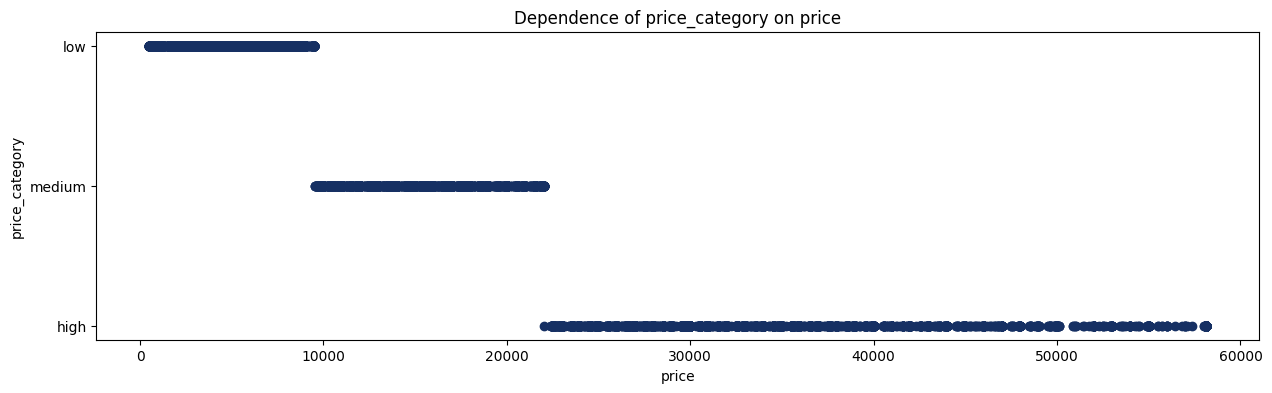

In [107]:
print_scatter(df_prepared['price'], df_prepared['price_category'], (15,4))

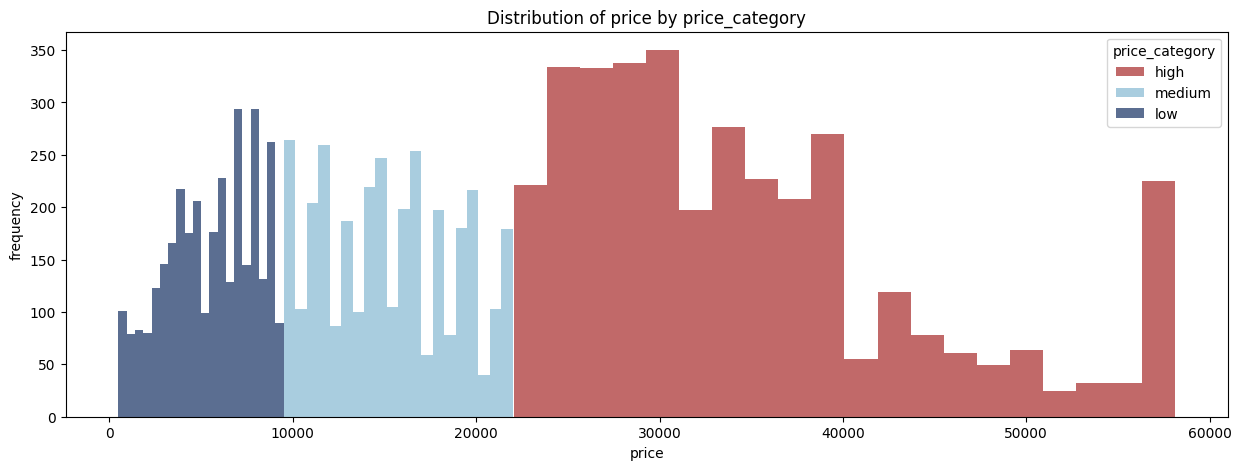

In [108]:
hist_by_target_feature(df_prepared, 'price', 'price_category', (15,5))

-
-
-

#### Manufacture year

In [109]:
outliers(df_prepared.year)

min year: 1915.0
max year: 2022.0
median year: 2013.0
Range of normal values (1994.5, 2030.5)
MINIMUM VALUE BELOW NORMAL
Number of outliers in the year column: 394
Percentage of outliers in the year column: 3.94 %


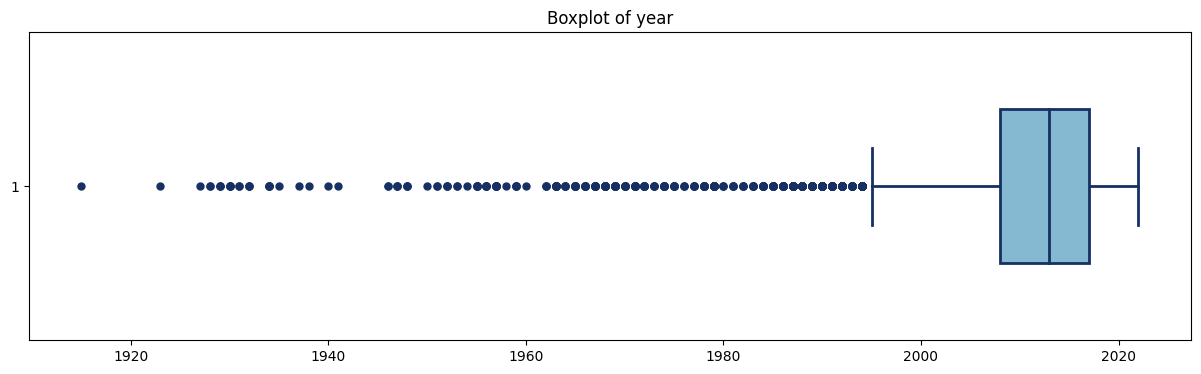

In [110]:
print_boxplot(df_prepared.year)

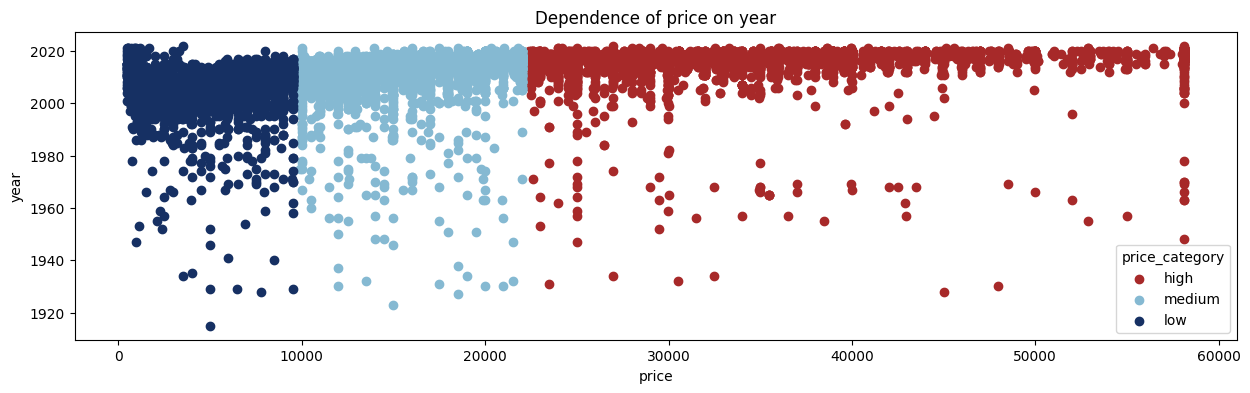

In [111]:
scatter_by_target_feature(df_prepared, 'price', 'year', 'price_category', (15, 4), 'lower right')

In [112]:
print('Average car prices by manufacture year')
price_by_year = df_prepared.groupby(['year'], as_index=False).agg({'price':'mean'}).rename(columns={'price':'mean_price'})
price_by_year.round(2).head(10)

Average car prices by manufacture year


,year,mean_price
0,1915.0,5000.00
1,1923.0,14950.00
2,1927.0,18500.00
3,1928.0,26400.00
4,1929.0,6981.67
5,1930.0,25237.50
6,1931.0,20500.00
7,1932.0,21833.33
8,1934.0,20498.75
9,1935.0,4000.00


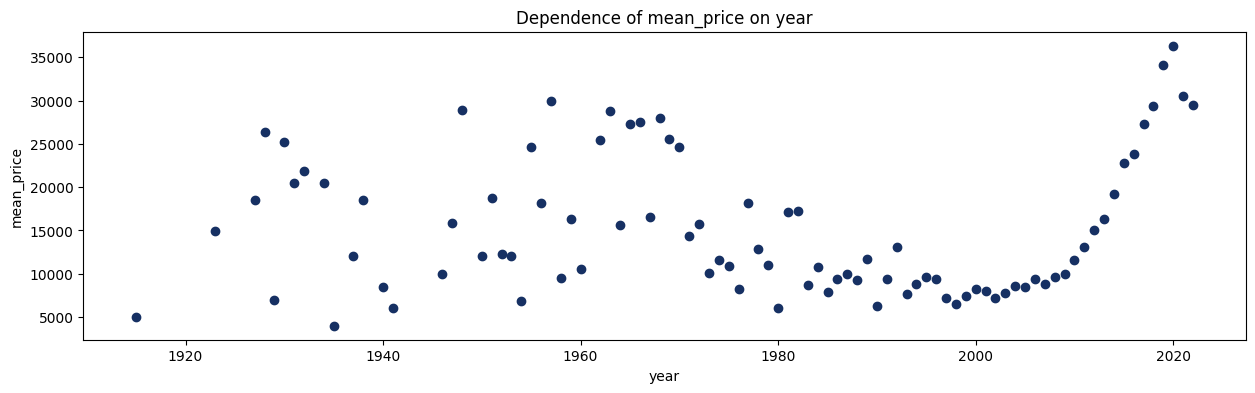

In [113]:
print_scatter(price_by_year['year'], price_by_year['mean_price'], (15,4))

In [114]:
print('Number of cars produced by manufacture year')
count_by_year = df_prepared.groupby(['year'], as_index=False)[['price']].count().rename(columns={'price': 'cars_count'})
count_by_year.head(10)

Number of cars produced by manufacture year


,year,cars_count
0,1915.0,1
1,1923.0,1
2,1927.0,1
3,1928.0,2
4,1929.0,3
5,1930.0,4
6,1931.0,2
7,1932.0,3
8,1934.0,4
9,1935.0,1


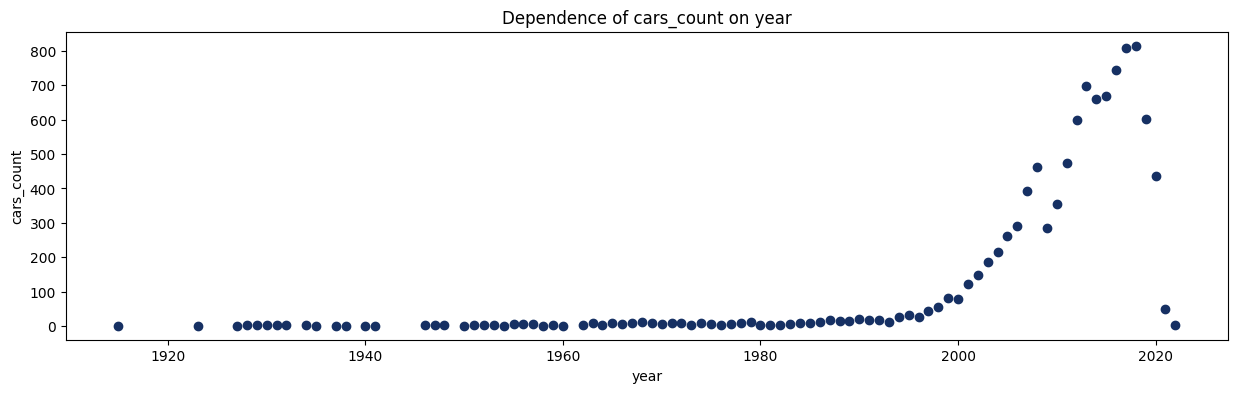

In [115]:
print_scatter(count_by_year['year'], count_by_year['cars_count'], (15,4))

In [116]:
lower_outlier_replacement(df_prepared, 'year')

In [117]:
outliers(df_prepared.year)

min year: 1994.5
max year: 2022.0
median year: 2013.0
Range of normal values (1994.5, 2030.5)
Number of outliers in the year column: 0
Percentage of outliers in the year column: 0.0 %


In [118]:
df_prepared.year = df_prepared.year.astype(int)
df_prepared.year.dtype

dtype('int64')

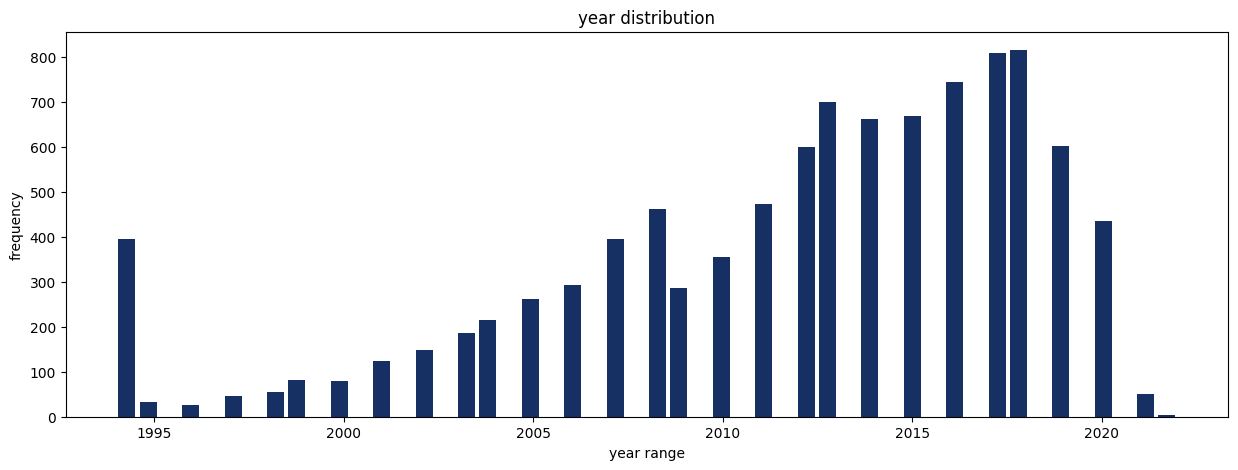

In [119]:
print_hist(df_prepared.year)

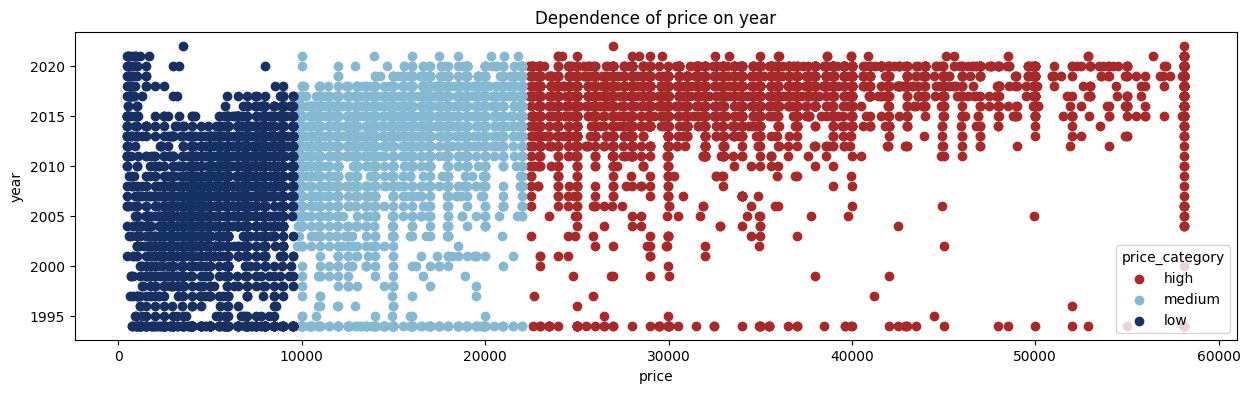

In [120]:
scatter_by_target_feature(df_prepared, 'price', 'year', 'price_category', (15, 4), 'lower right')

In [121]:
df_prepared[['year', 'price_cat_num']].corr().round(2)

,year,price_cat_num
year,1.00,0.55
price_cat_num,0.55,1.00


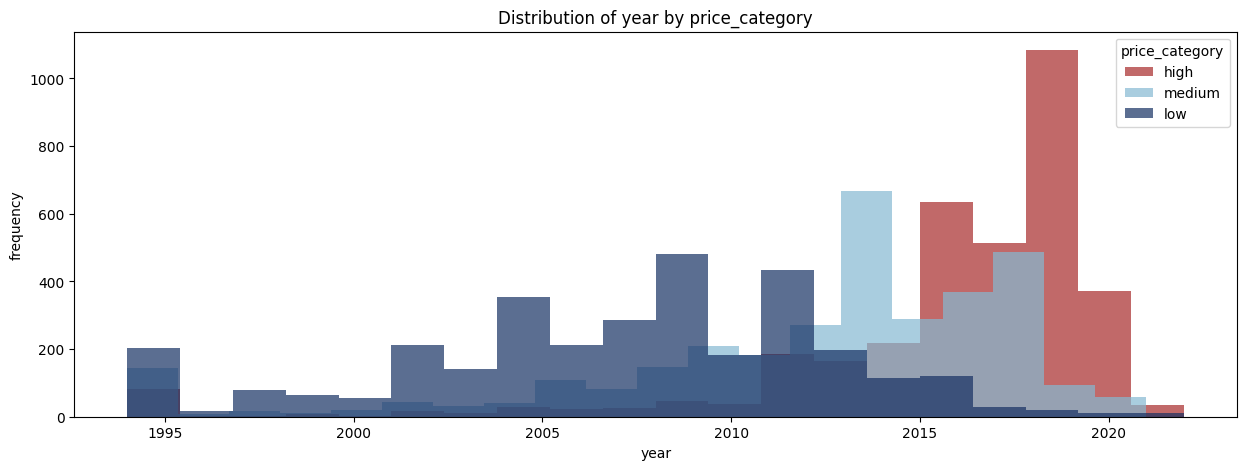

In [122]:
hist_by_target_feature(df_prepared, 'year', 'price_category', (15,5))

-
-
-

#### Odometer value

In [123]:
outliers(df_prepared.odometer)

min odometer: 0.0
max odometer: 3245000.0
median odometer: 88514.0
Range of normal values (-107440.0, 283464.0)
MAXIMUM VALUE ABOVE NORMAL
Number of outliers in the odometer column: 91
Percentage of outliers in the odometer column: 0.91 %


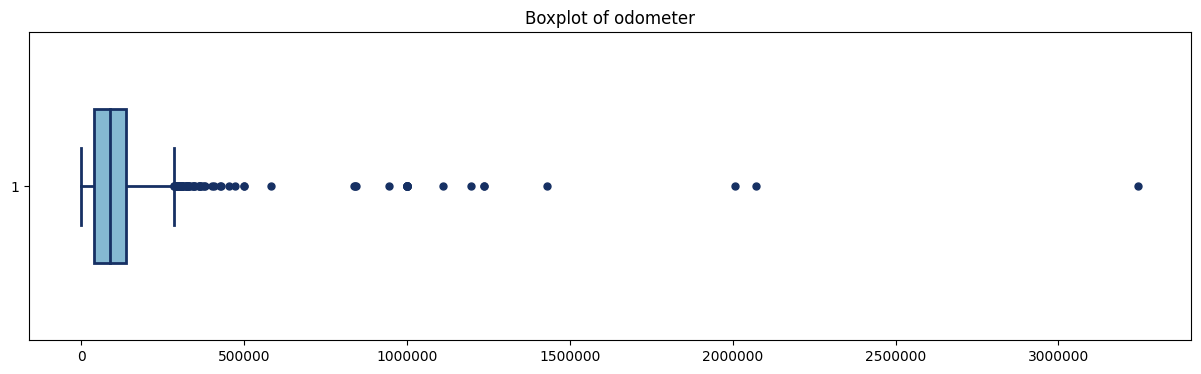

In [124]:
print_boxplot(df_prepared.odometer)

In [125]:
df_prepared[['odometer', 'price_cat_num']].corr().round(2)

,odometer,price_cat_num
odometer,1.0,-0.4
price_cat_num,-0.4,1.0


In [126]:
upper_outlier_replacement(df_prepared, 'odometer')

In [127]:
outliers(df_prepared.odometer)

min odometer: 0.0
max odometer: 283464.0
median odometer: 88514.0
Range of normal values (-107440.0, 283464.0)
Number of outliers in the odometer column: 0
Percentage of outliers in the odometer column: 0.0 %


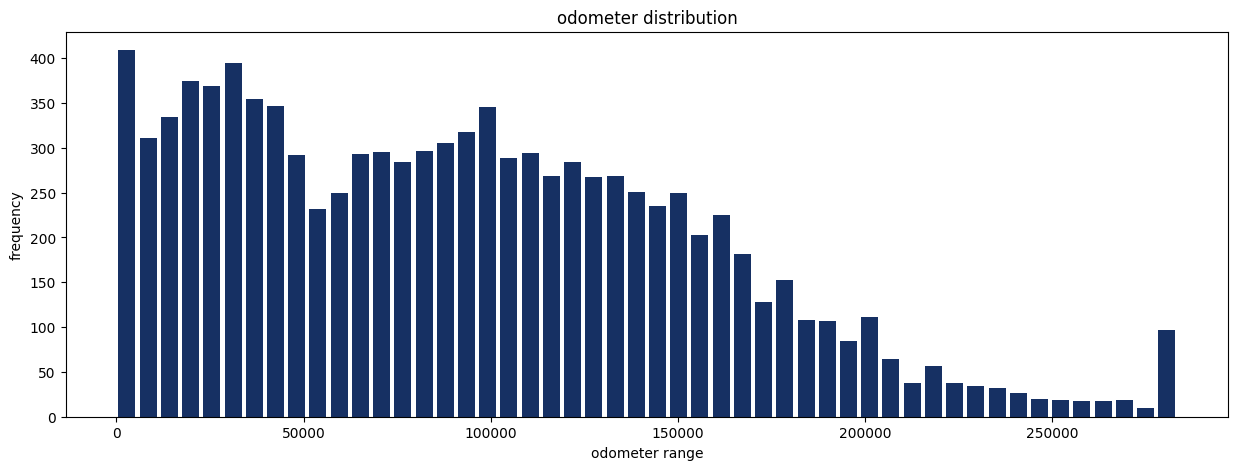

In [128]:
print_hist(df_prepared.odometer)

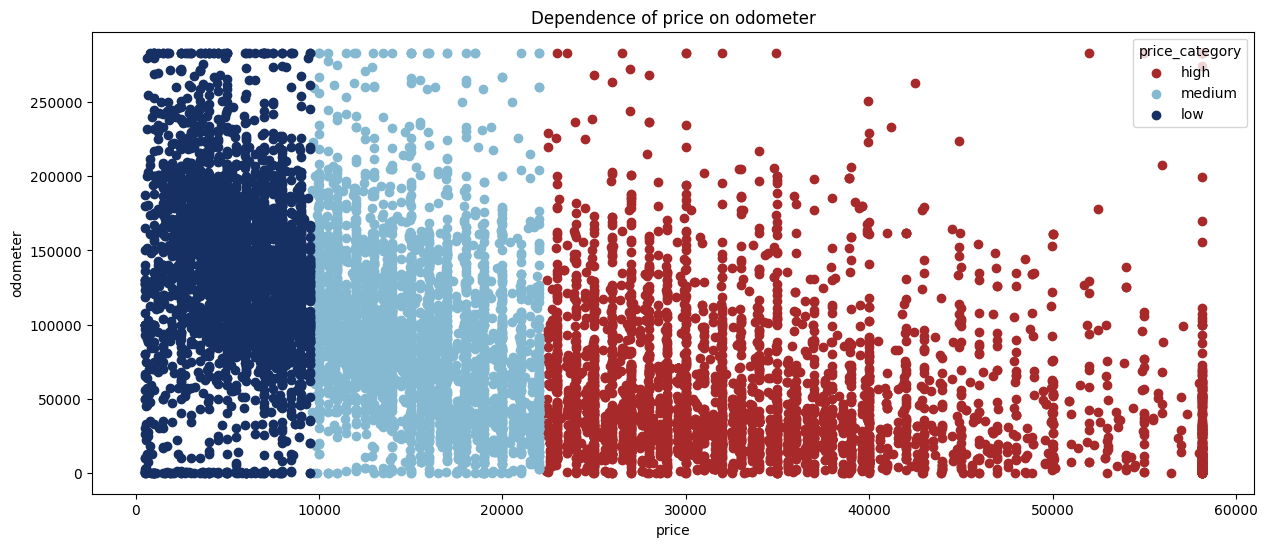

In [129]:
scatter_by_target_feature(df_prepared, 'price', 'odometer', 'price_category', (15, 6), 'upper right')

In [130]:
df_prepared[['odometer', 'price_cat_num']].corr().round(2)

,odometer,price_cat_num
odometer,1.00,-0.54
price_cat_num,-0.54,1.00


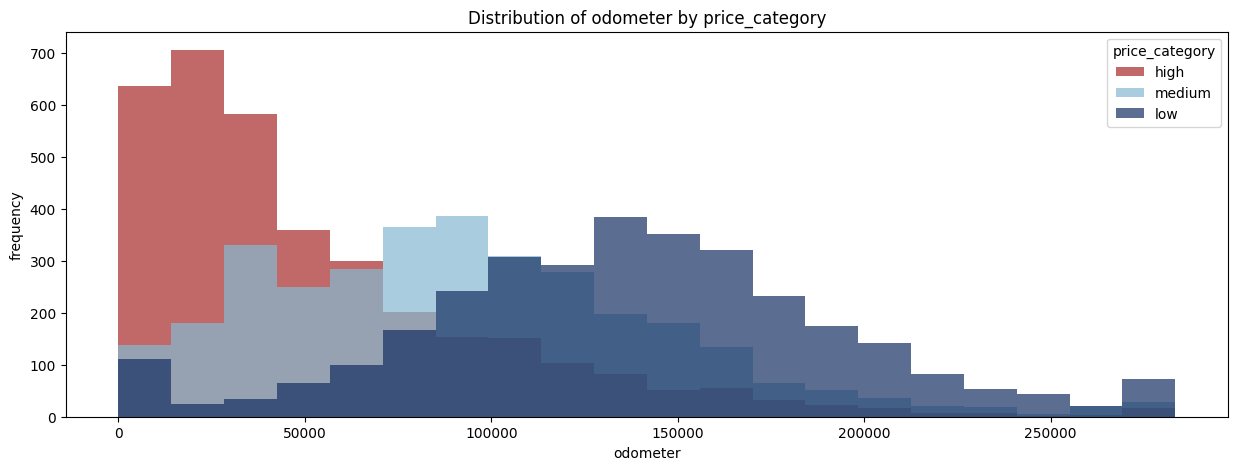

In [131]:
hist_by_target_feature(df_prepared, 'odometer', 'price_category', (15,5))

-
-
-
-
-

#### Number of cylinders

In [132]:
outliers(df_prepared.cylinders)

min cylinders: 0
max cylinders: 12
median cylinders: 4.0
Range of normal values (-9.0, 15.0)
Number of outliers in the cylinders column: 0
Percentage of outliers in the cylinders column: 0.0 %


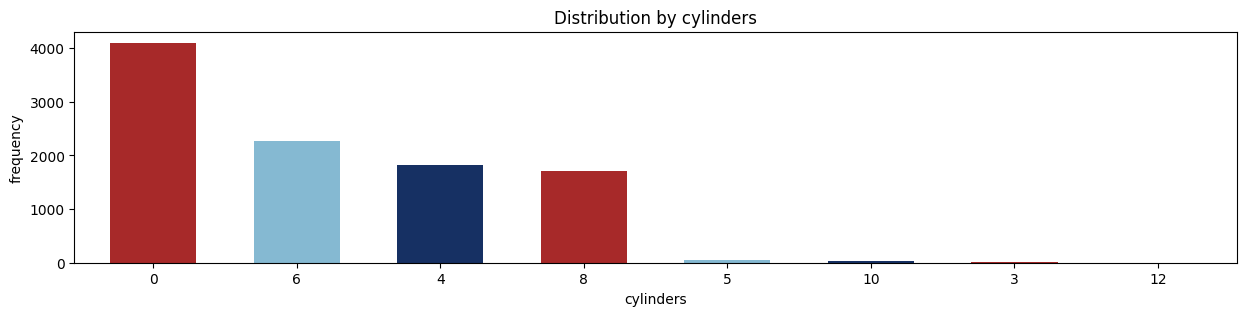

In [133]:
print_bar(df_prepared.cylinders, (15,3), 0)

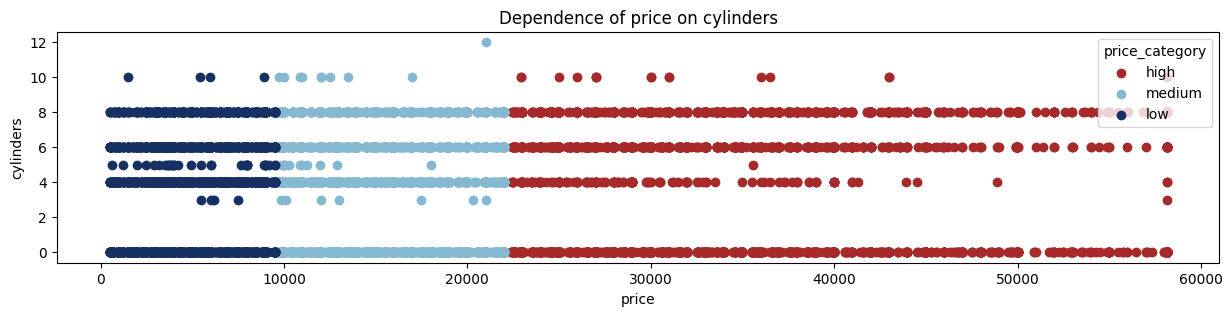

In [134]:
scatter_by_target_feature(df_prepared, 'price', 'cylinders', 'price_category', (15, 3), 'upper right')

In [135]:
df_prepared[['cylinders', 'price_cat_num']].corr().round(2)

,cylinders,price_cat_num
cylinders,1.00,-0.01
price_cat_num,-0.01,1.00


In [136]:
df_prepared = df_prepared.drop(columns=['cylinders'])

-
-
-
-
-

#### Latitude & Longitude

In [137]:
outliers(df_prepared.lat)

min lat: -67.0
max lat: 65.0
median lat: 39.0
Range of normal values (24.5, 52.5)
MINIMUM VALUE BELOW NORMAL
MAXIMUM VALUE ABOVE NORMAL
Number of outliers in the lat column: 143
Percentage of outliers in the lat column: 1.43 %


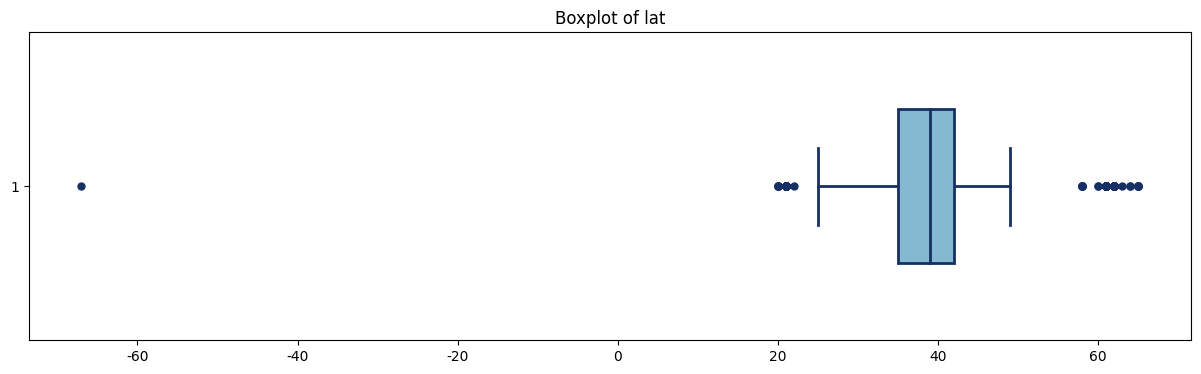

In [138]:
print_boxplot(df_prepared.lat)

In [139]:
df_prepared[['lat', 'price_cat_num']].corr().round(2)

,lat,price_cat_num
lat,1.00,-0.02
price_cat_num,-0.02,1.00


In [140]:
lower_outlier_replacement(df_prepared, 'lat')
upper_outlier_replacement(df_prepared, 'lat')

In [141]:
df_prepared[['lat', 'price_cat_num']].corr().round(2)

,lat,price_cat_num
lat,1.00,-0.03
price_cat_num,-0.03,1.00


In [142]:
outliers(df_prepared.long)

min long: -158.0
max long: 174.0
median long: -88.0
Range of normal values (-151.0, -39.0)
MINIMUM VALUE BELOW NORMAL
MAXIMUM VALUE ABOVE NORMAL
Number of outliers in the long column: 57
Percentage of outliers in the long column: 0.57 %


In [143]:
lower_outlier_replacement(df_prepared, 'long')
upper_outlier_replacement(df_prepared, 'long')

In [144]:
df_prepared[['long', 'price_cat_num']].corr().round(2)

,long,price_cat_num
long,1.00,-0.05
price_cat_num,-0.05,1.00


In [145]:
df_prepared = df_prepared.drop(columns=['lat', 'long'])
df_prepared.columns

Index(['price', 'year', 'manufacturer', 'condition', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
       'state', 'price_category', 'description_len', 'price_cat_num'],
      dtype='object')

-
-
-

#### Description length

In [146]:
outliers(df_prepared['description_len'])

min description_len: 4
max description_len: 26777
median description_len: 2213.0
Range of normal values (-5085.0, 9875.0)
MAXIMUM VALUE ABOVE NORMAL
Number of outliers in the description_len column: 271
Percentage of outliers in the description_len column: 2.71 %


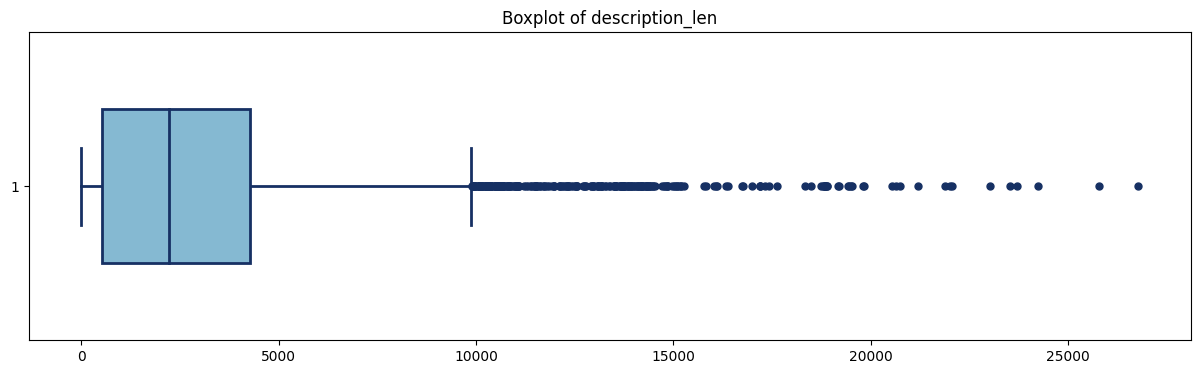

In [147]:
print_boxplot(df_prepared['description_len'])

In [148]:
df_prepared[['description_len', 'price_cat_num']].corr().round(2)

,description_len,price_cat_num
description_len,1.00,0.37
price_cat_num,0.37,1.00


In [149]:
upper_outlier_replacement(df_prepared, 'description_len')

In [150]:
outliers(df_prepared['description_len'])

min description_len: 4
max description_len: 9875
median description_len: 2213.0
Range of normal values (-5085.0, 9875.0)
Number of outliers in the description_len column: 0
Percentage of outliers in the description_len column: 0.0 %


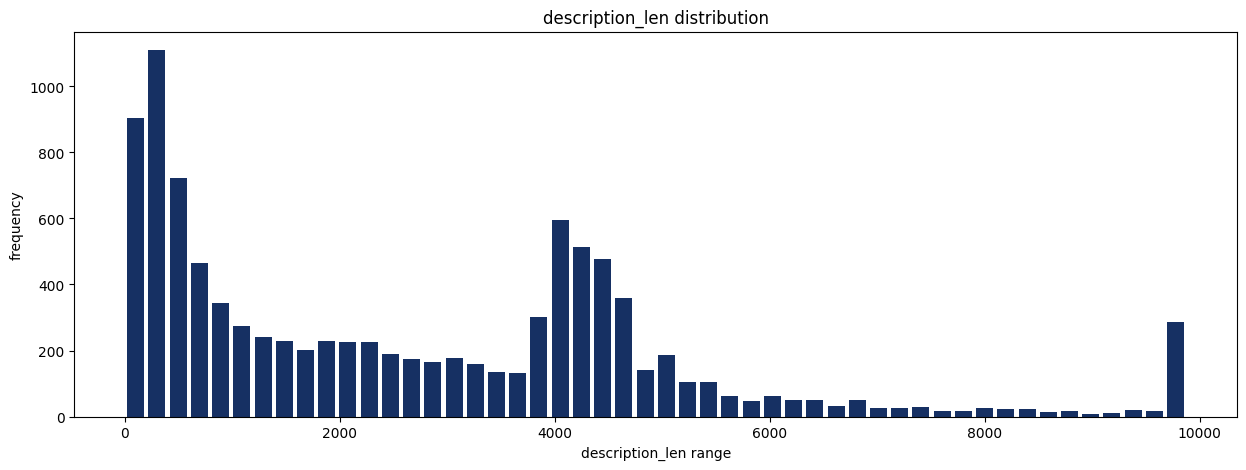

In [151]:
print_hist(df_prepared['description_len'])

In [152]:
df_prepared[['description_len', 'price_cat_num']].corr().round(2)

,description_len,price_cat_num
description_len,1.00,0.42
price_cat_num,0.42,1.00


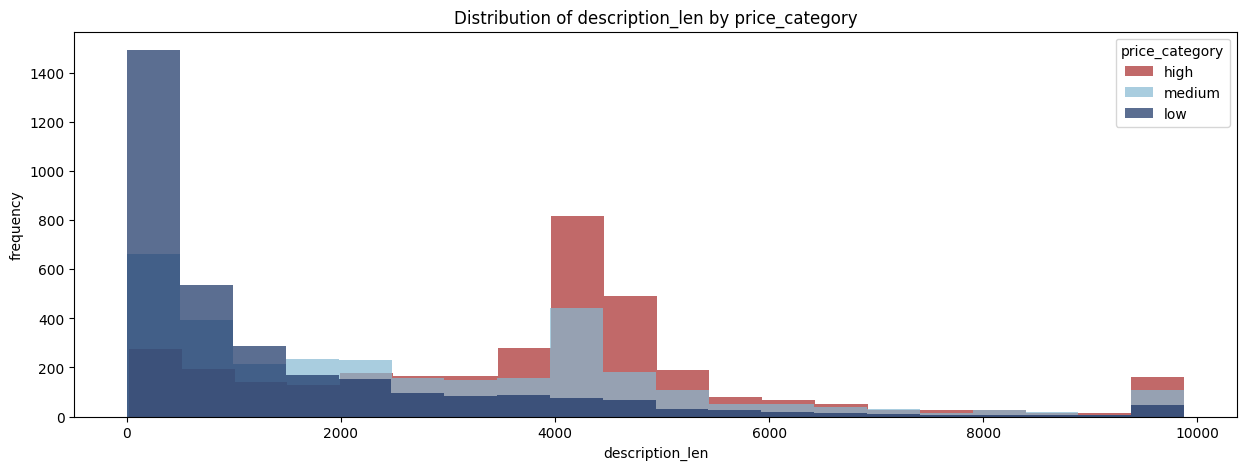

In [153]:
hist_by_target_feature(df_prepared, 'description_len', 'price_category', (15,5))

-
-
-

### Data standardization by scaling to unit variance

In [154]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [155]:
std_scaler.fit(df_prepared[['price', 'odometer', 'description_len']])
std_scaled = std_scaler.transform(df_prepared[['price', 'odometer', 'description_len']])
df_prepared[['scaled_price', 'scaled_odometer', 'scaled_description_len']] = std_scaled

df_prepared[['scaled_price', 'scaled_odometer', 'scaled_description_len']].head()

,scaled_price,scaled_odometer,scaled_description_len
0,2.629980,-1.042426,0.744445
1,-0.148218,-0.526750,-0.725735
2,1.213426,-1.254420,0.662443
3,-0.326528,0.379661,0.225238
4,0.206505,-1.350144,-0.905637


In [156]:
print(df_prepared['price'].corr(df_prepared['scaled_price']))
print(df_prepared['odometer'].corr(df_prepared['scaled_odometer']))
print(df_prepared['description_len'].corr(df_prepared['scaled_description_len']))

0.9999999999999996
0.9999999999999998
1.0


In [157]:
df_prepared = df_prepared.drop(columns=['price', 'odometer', 'description_len'])

In [158]:
df_prepared.corr().round(2)

,year,price_cat_num,scaled_price,scaled_odometer,scaled_description_len
year,1.00,0.55,0.53,-0.50,0.42
price_cat_num,0.55,1.00,0.88,-0.54,0.42
scaled_price,0.53,0.88,1.00,-0.53,0.40
scaled_odometer,-0.50,-0.54,-0.53,1.00,-0.35
scaled_description_len,0.42,0.42,0.40,-0.35,1.00


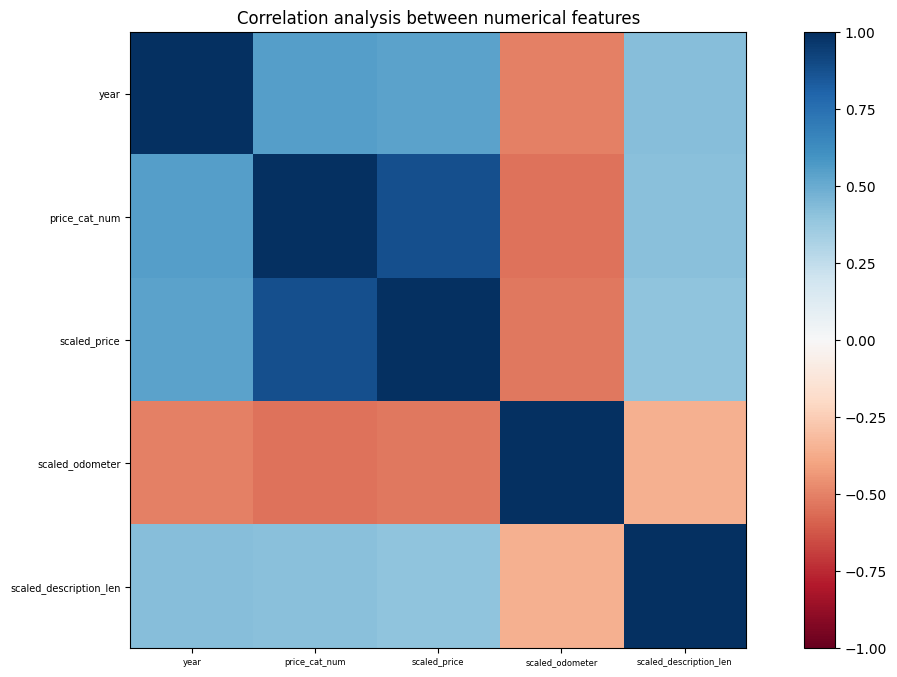

In [159]:
print_corr(df_prepared)

-
-
-
-
-

### Categorical data (analysis and encoding)

In [160]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [161]:
def ohe_transformation(data, col_name):
    ohe.fit(data[[col_name]])
    ohe_col = ohe.transform(data[[col_name]])
    ohe_df = pd.DataFrame(ohe_col, columns = [ohe.get_feature_names_out()])
    return ohe_df

In [162]:
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    9997 non-null   int64  
 1   manufacturer            9997 non-null   object 
 2   condition               9997 non-null   object 
 3   fuel                    9997 non-null   object 
 4   title_status            9997 non-null   object 
 5   transmission            9997 non-null   object 
 6   drive                   9997 non-null   object 
 7   size                    9997 non-null   object 
 8   type                    9997 non-null   object 
 9   paint_color             9997 non-null   object 
 10  state                   9997 non-null   object 
 11  price_category          9997 non-null   object 
 12  price_cat_num           9997 non-null   int64  
 13  scaled_price            9997 non-null   float64
 14  scaled_odometer         9997 non-null   

-
-
-

#### State

In [163]:
print('Number of unique values in the state column:', df_prepared.state.nunique())

Number of unique values in the state column: 51


In [164]:
percentage_values(df_prepared.state).head(10)

Percentage of occurrence of each state value in the dataset


,count,percentage
ca,1107,11.07
fl,682,6.82
tx,535,5.35
mi,461,4.61
ny,451,4.51
oh,410,4.10
pa,354,3.54
nc,349,3.49
or,332,3.32
wa,314,3.14


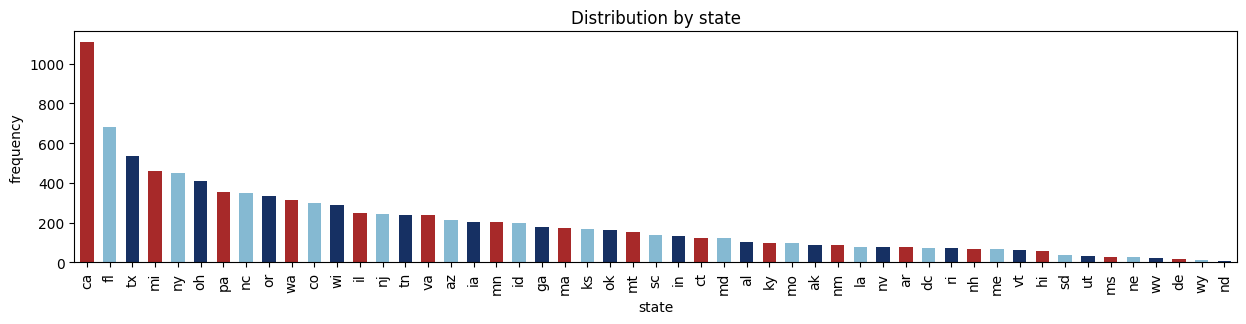

In [165]:
print_bar(df_prepared.state, (15,3), 90)

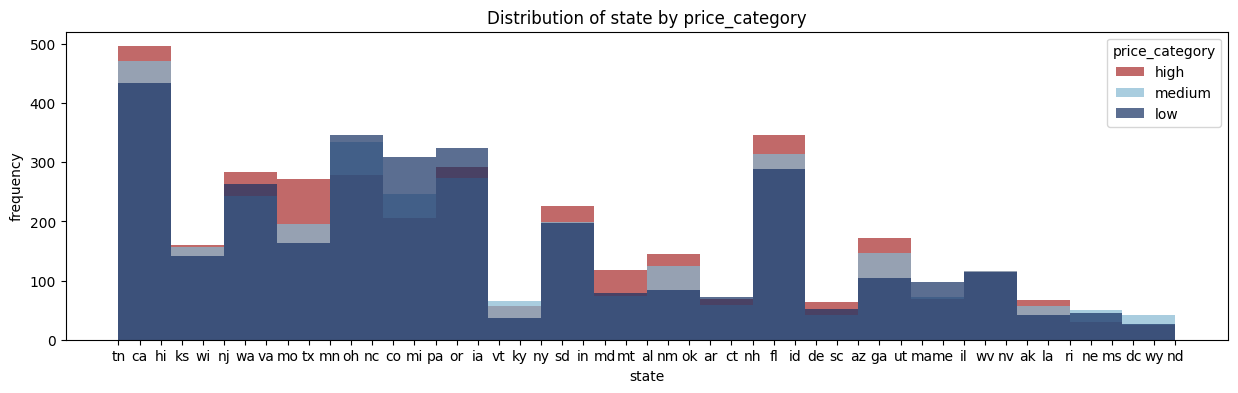

In [166]:
hist_by_target_feature(df_prepared, 'state', 'price_category', (15,4))

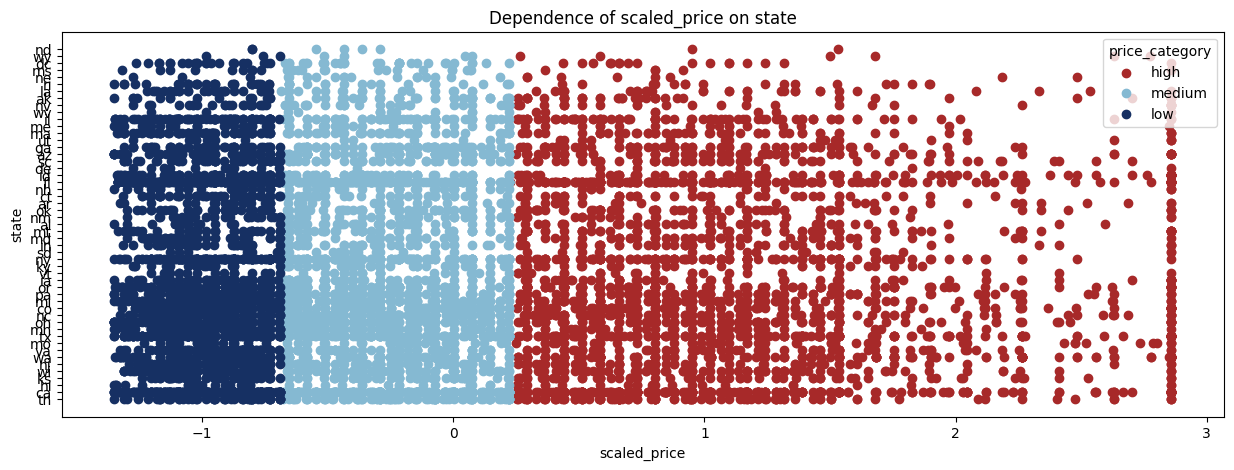

In [167]:
scatter_by_target_feature(df_prepared, 'scaled_price', 'state', 'price_category', (15, 5), 'upper right')

In [168]:
ohe_state = ohe_transformation(df_prepared, 'state')
ohe_state.head()

,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


-
-
-

#### Manufacturer

In [169]:
print('Number of unique values in the manufacturer column:', df_prepared.manufacturer.nunique())

Number of unique values in the manufacturer column: 40


In [170]:
percentage_values(df_prepared.manufacturer)

Percentage of occurrence of each manufacturer value in the dataset


,count,percentage
ford,1638,16.38
chevrolet,1293,12.93
toyota,779,7.79
jeep,490,4.90
honda,466,4.66
nissan,454,4.54
ram,411,4.11
other,379,3.79
gmc,358,3.58
bmw,330,3.30


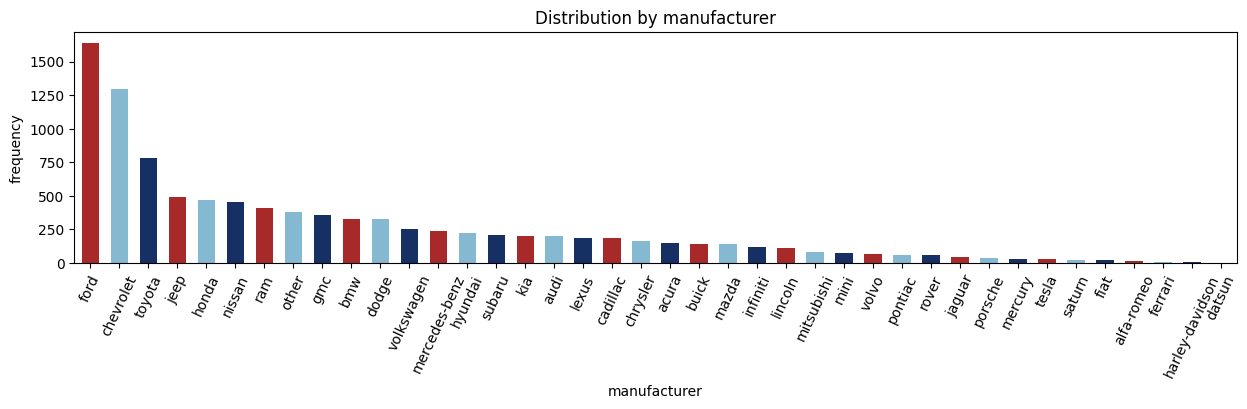

In [171]:
print_bar(df_prepared.manufacturer, (15,3), 65)

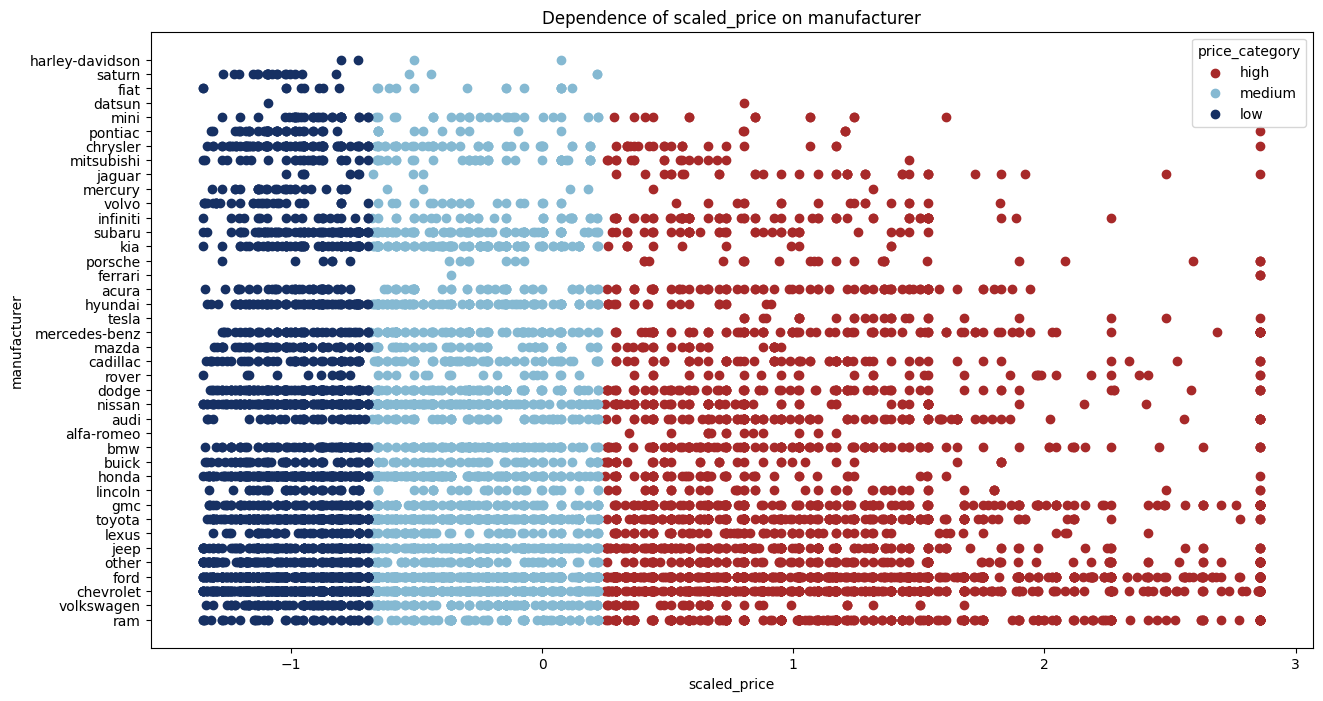

In [172]:
scatter_by_target_feature(df_prepared, 'scaled_price', 'manufacturer', 'price_category', (15, 8), 'upper right')

In [173]:
ohe_manufacturer = ohe_transformation(df_prepared, 'manufacturer')
ohe_manufacturer.head()

,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,...,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


-
-
-

#### Car body type

In [174]:
print('Number of unique values in the type column:', df_prepared.type.nunique())

Number of unique values in the type column: 13


In [175]:
percentage_values(df_prepared.type)

Percentage of occurrence of each type value in the dataset


,count,percentage
other,2708,27.09
sedan,1974,19.75
SUV,1794,17.95
pickup,1064,10.64
truck,766,7.66
coupe,442,4.42
hatchback,410,4.10
wagon,255,2.55
van,226,2.26
convertible,203,2.03


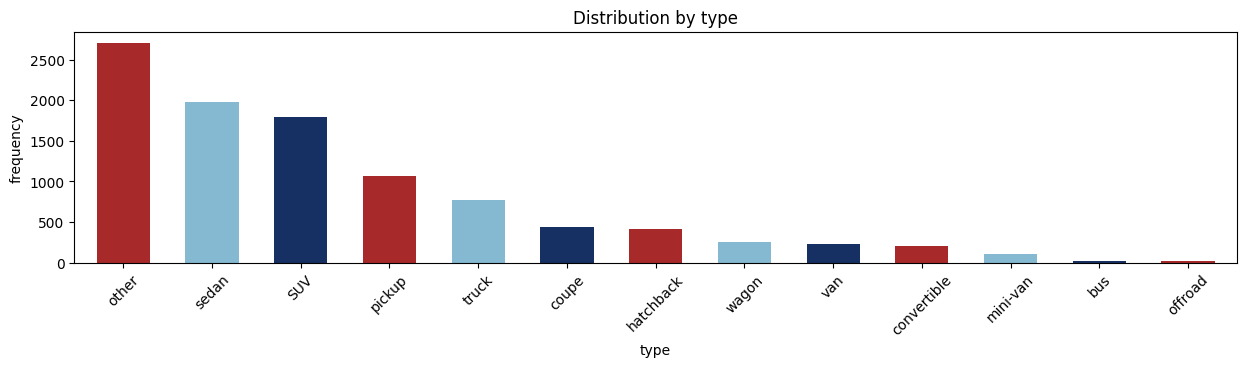

In [176]:
print_bar(df_prepared.type, (15,3), 45)

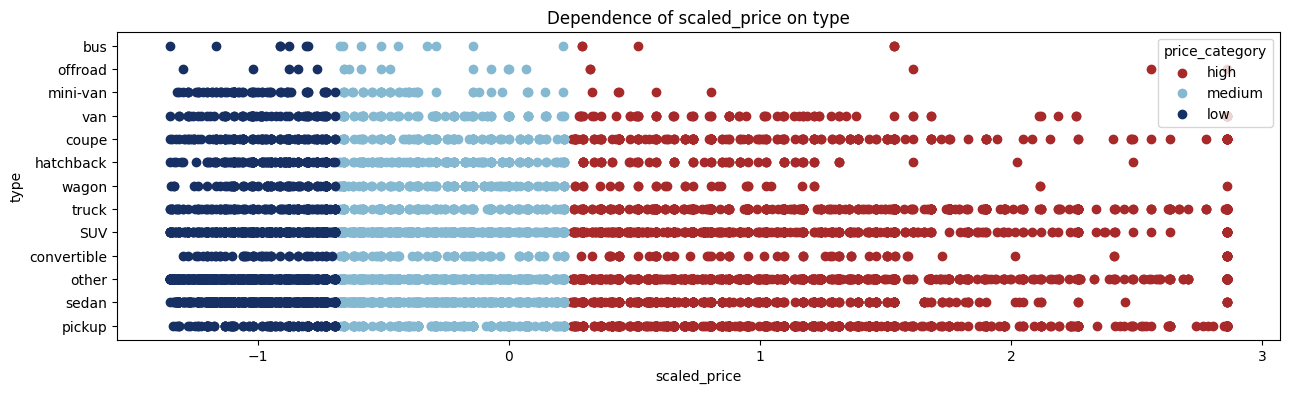

In [177]:
scatter_by_target_feature(df_prepared, 'scaled_price', 'type', 'price_category', (15, 4), 'upper right')

In [178]:
ohe_type = ohe_transformation(df_prepared, 'type')
ohe_type.head()

,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


-
-
-

#### Car size

In [179]:
print('Number of unique values in the size column:', df_prepared['size'].nunique())

Number of unique values in the size column: 5


In [180]:
percentage_values(df_prepared['size'])

Percentage of occurrence of each size value in the dataset


,count,percentage
other,7188,71.90
full-size,1468,14.68
mid-size,821,8.21
compact,453,4.53
sub-compact,67,0.67


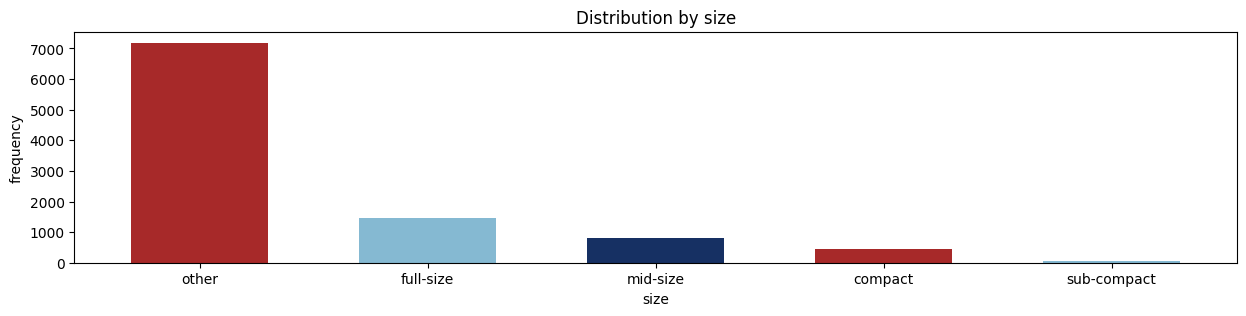

In [181]:
print_bar(df_prepared['size'], (15,3), 0)

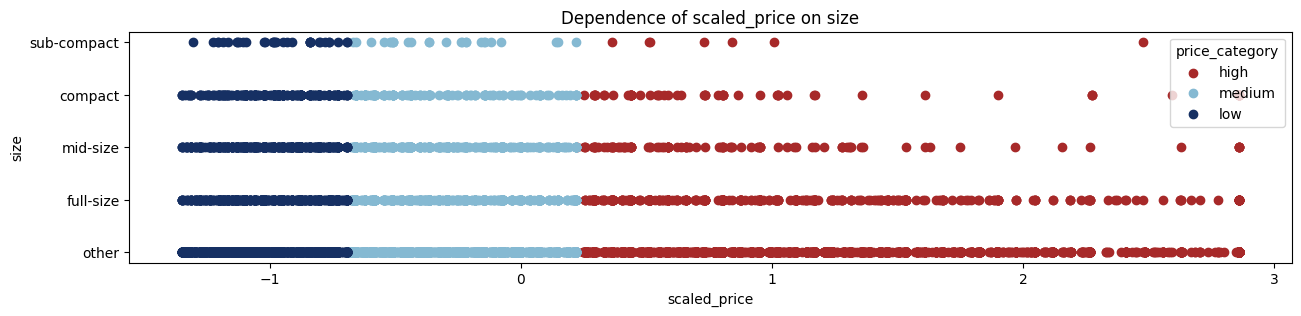

In [182]:
scatter_by_target_feature(df_prepared, 'scaled_price', 'size', 'price_category', (15, 3), 'upper right')

In [183]:
ohe_size = ohe_transformation(df_prepared, 'size')
ohe_size.head()

,size_compact,size_full-size,size_mid-size,size_other,size_sub-compact
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


-
-
-

#### Paint color

In [184]:
print('Number of unique values in the paint_color column:', df_prepared['paint_color'].nunique())

Number of unique values in the paint_color column: 13


In [185]:
percentage_values(df_prepared['paint_color'])

Percentage of occurrence of each paint_color value in the dataset


,count,percentage
other,2948,29.49
white,1906,19.07
black,1462,14.62
silver,1038,10.38
red,735,7.35
blue,727,7.27
grey,601,6.01
green,170,1.70
custom,153,1.53
brown,143,1.43


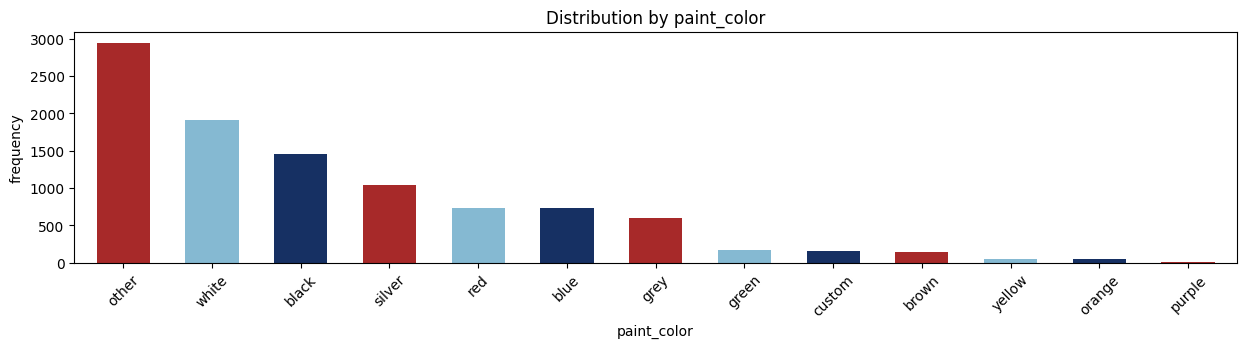

In [186]:
print_bar(df_prepared['paint_color'], (15,3), 45)

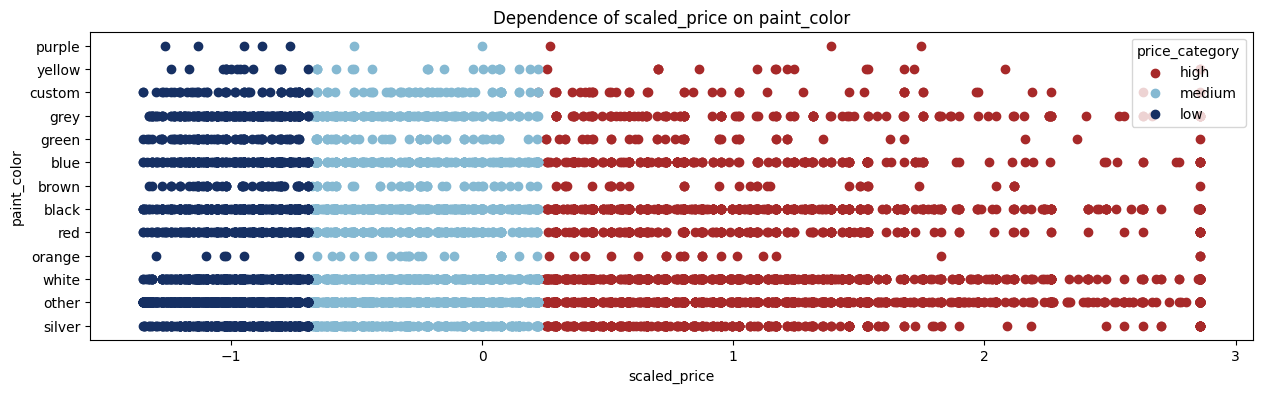

In [187]:
scatter_by_target_feature(df_prepared, 'scaled_price', 'paint_color', 'price_category', (15, 4), 'upper right')

In [188]:
ohe_paint_color = ohe_transformation(df_prepared, 'paint_color')
ohe_paint_color.head()

,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_other,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


-
-
-

#### Fuel type

In [189]:
print('Number of unique values in the fuel column:', df_prepared.fuel.nunique())

Number of unique values in the fuel column: 5


In [190]:
percentage_values(df_prepared.fuel)

Percentage of occurrence of each fuel value in the dataset


,count,percentage
gas,8402,84.05
other,790,7.90
diesel,653,6.53
hybrid,108,1.08
electric,44,0.44


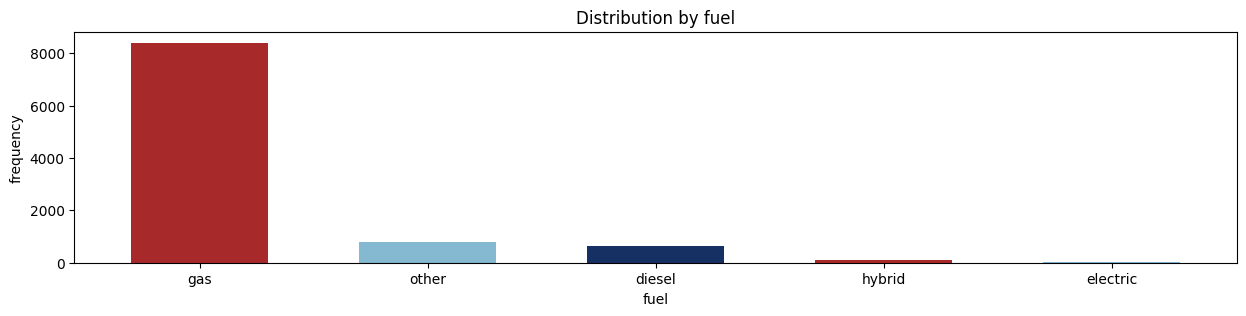

In [191]:
print_bar(df_prepared.fuel, (15,3), 0)

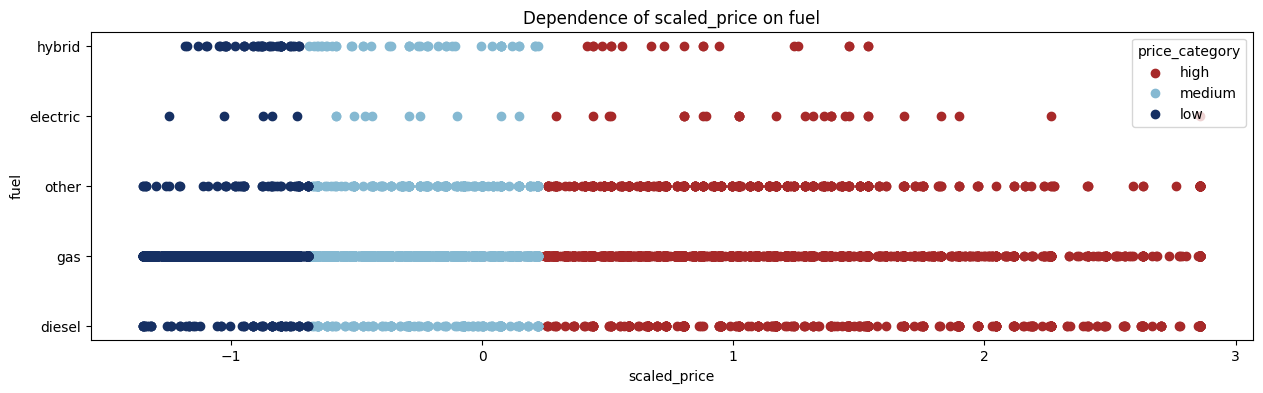

In [192]:
scatter_by_target_feature(df_prepared, 'scaled_price', 'fuel', 'price_category', (15, 4), 'upper right')

In [193]:
ohe_fuel = ohe_transformation(df_prepared, 'fuel')
ohe_fuel.head()

,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


-
-
-

#### Transmission type

In [194]:
print('Number of unique values in the transmission column:', df_prepared.transmission.nunique())

Number of unique values in the transmission column: 3


In [195]:
percentage_values(df_prepared.transmission)

Percentage of occurrence of each transmission value in the dataset


,count,percentage
automatic,7700,77.02
other,1666,16.66
manual,631,6.31


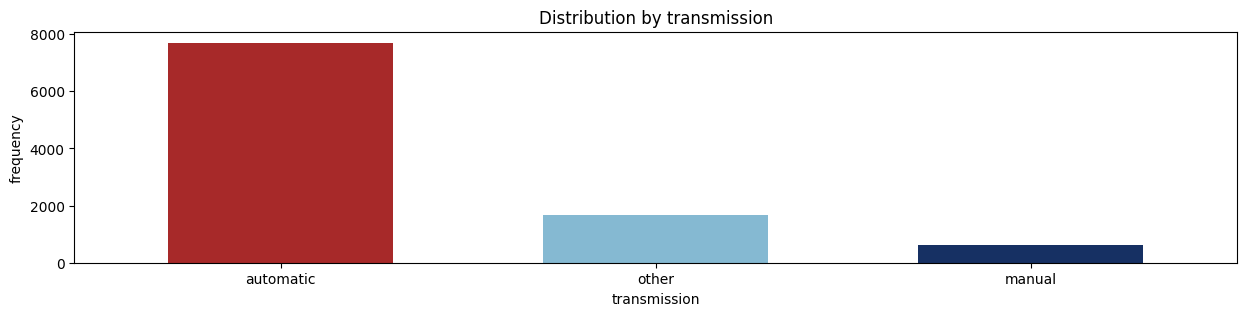

In [196]:
print_bar(df_prepared.transmission, (15,3), 0)

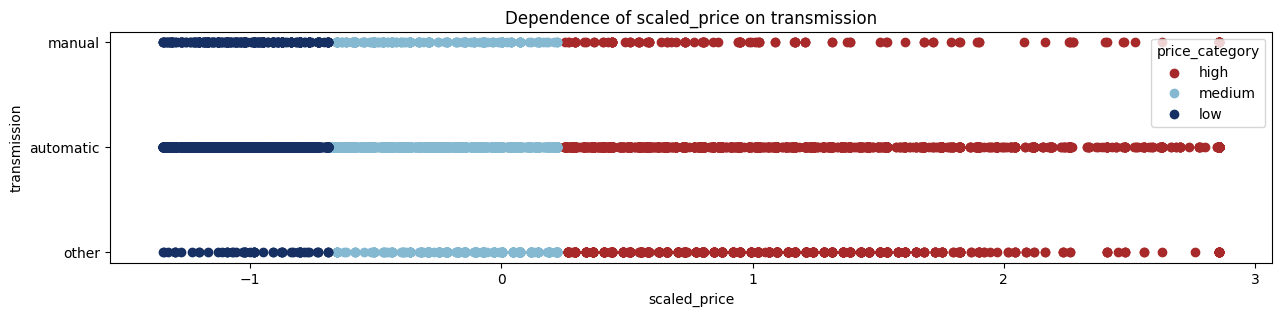

In [197]:
scatter_by_target_feature(df_prepared, 'scaled_price', 'transmission', 'price_category', (15, 3), 'upper right')

In [198]:
ohe_transmission = ohe_transformation(df_prepared, 'transmission')
ohe_transmission.head()

,transmission_automatic,transmission_manual,transmission_other
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


-
-
-

#### Driveline system

In [199]:
print('Number of unique values in the drive column:', df_prepared.drive.nunique())

Number of unique values in the drive column: 4


In [200]:
percentage_values(df_prepared.drive)

Percentage of occurrence of each drive value in the dataset


,count,percentage
4wd,3038,30.39
other,3003,30.04
fwd,2550,25.51
rwd,1406,14.06


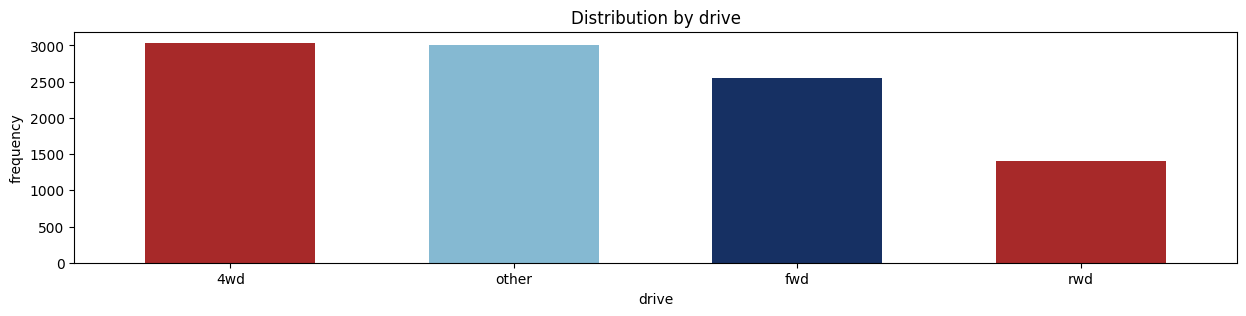

In [201]:
print_bar(df_prepared.drive, (15,3), 0)

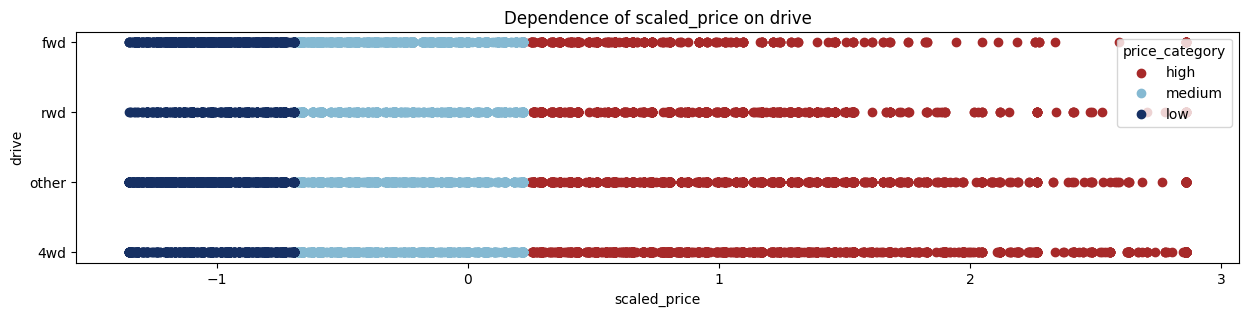

In [202]:
scatter_by_target_feature(df_prepared, 'scaled_price', 'drive', 'price_category', (15, 3), 'upper right')

In [203]:
ohe_drive = ohe_transformation(df_prepared, 'drive')
ohe_drive.head()

,drive_4wd,drive_fwd,drive_other,drive_rwd
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0


-
-
-

#### Car condition

In [204]:
print('Number of unique values in the condition column:', df_prepared.condition.nunique())

Number of unique values in the condition column: 7


In [205]:
percentage_values(df_prepared.condition)

Percentage of occurrence of each condition value in the dataset


,count,percentage
other,3763,37.64
good,3116,31.17
excellent,2419,24.20
like new,478,4.78
fair,177,1.77
new,31,0.31
salvage,13,0.13


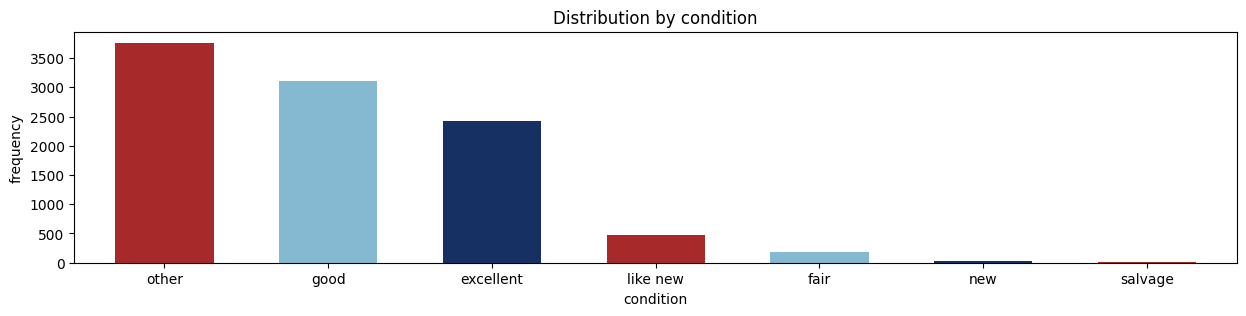

In [206]:
print_bar(df_prepared.condition, (15,3), 0)

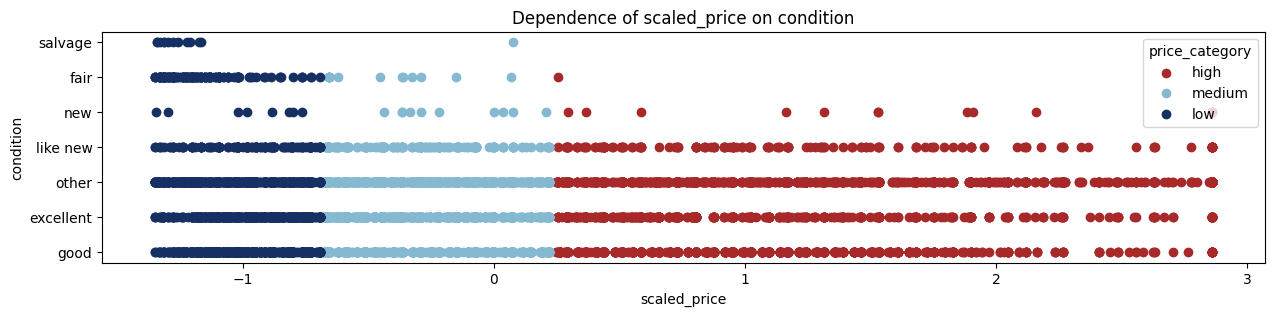

In [207]:
scatter_by_target_feature(df_prepared, 'scaled_price', 'condition', 'price_category', (15, 3), 'upper right')

In [208]:
ohe_condition = ohe_transformation(df_prepared, 'condition')
ohe_condition.head()

,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_other,condition_salvage
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0


-
-
-

#### Title status

In [209]:
print('Number of unique values in the title_status column:', df_prepared['title_status'].nunique())

Number of unique values in the title_status column: 7


In [210]:
percentage_values(df_prepared['title_status'])

Percentage of occurrence of each title_status value in the dataset


,count,percentage
clean,9517,95.20
rebuilt,171,1.71
other,164,1.64
salvage,92,0.92
lien,35,0.35
missing,16,0.16
parts only,2,0.02


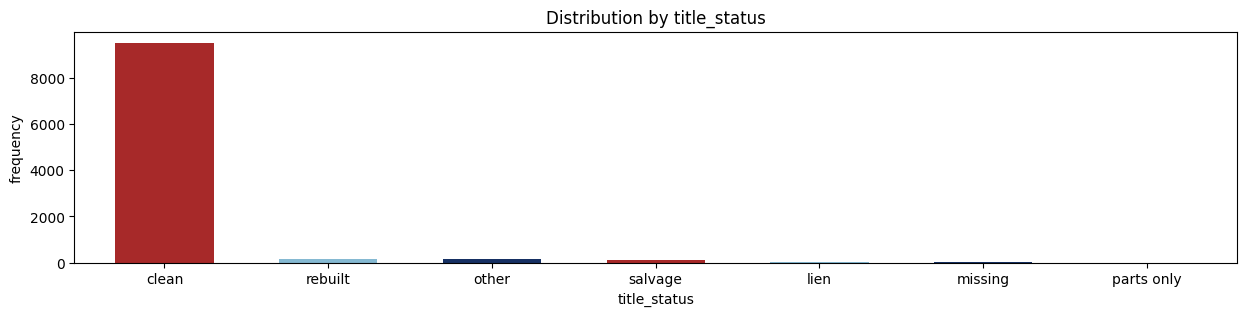

In [211]:
print_bar(df_prepared['title_status'], (15,3), 0)

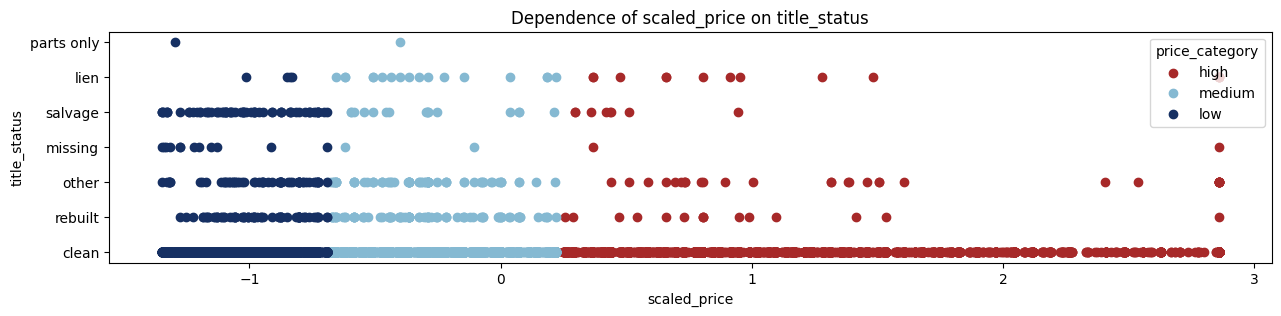

In [212]:
scatter_by_target_feature(df_prepared, 'scaled_price', 'title_status', 'price_category', (15, 3), 'upper right')

In [213]:
ohe_title_status = ohe_transformation(df_prepared, 'title_status')
ohe_title_status.head()

,title_status_clean,title_status_lien,title_status_missing,title_status_other,title_status_parts only,title_status_rebuilt,title_status_salvage
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


-
-
-
-
-

#### Saving the dataframe for further modeling

In [214]:
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    9997 non-null   int64  
 1   manufacturer            9997 non-null   object 
 2   condition               9997 non-null   object 
 3   fuel                    9997 non-null   object 
 4   title_status            9997 non-null   object 
 5   transmission            9997 non-null   object 
 6   drive                   9997 non-null   object 
 7   size                    9997 non-null   object 
 8   type                    9997 non-null   object 
 9   paint_color             9997 non-null   object 
 10  state                   9997 non-null   object 
 11  price_category          9997 non-null   object 
 12  price_cat_num           9997 non-null   int64  
 13  scaled_price            9997 non-null   float64
 14  scaled_odometer         9997 non-null   

In [218]:
columns_for_drop = ['state', 
                    'manufacturer',
                    'type', 
                    'size',
                    'paint_color',                    
                    'fuel', 
                    'transmission',
                    'drive',
                    'condition',
                    'title_status', 
                    'price_category']
df_encoded = df_prepared.drop(columns=columns_for_drop)
df_encoded.columns.tolist()

['year',
 'price_cat_num',
 'scaled_price',
 'scaled_odometer',
 'scaled_description_len']

In [219]:
columns_for_add = [df_encoded,
                   ohe_state,
                   ohe_manufacturer,
                   ohe_type,
                   ohe_size,
                   ohe_paint_color,
                   ohe_fuel,
                   ohe_transmission,
                   ohe_drive,
                   ohe_condition,
                   ohe_title_status]
df_encoded = pd.concat(columns_for_add, axis=1)
df_encoded.shape

(9997, 153)

In [220]:
df_encoded.to_csv('data/df_encoded.csv', index=False)

-
-
-

NAVIGATION

[<- Data Cleaning](retro_cars_cleaning.ipynb) | [Classification models ->](retro_cars_modeling.ipynb)